In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading the training data
train_data = pd.read_csv("/Users/rohanshenoy/Downloads/train (4).csv")
train_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


In [3]:
# Extract features (x_train) and target variable (y_train)
x_train = train_data[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y_train = train_data['Survived']
x_train=x_train.replace("female",1)
x_train=x_train.replace("male",0)
x_train

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
572,3,0,19.0,0,0,14.5000
573,2,1,34.0,0,0,13.0000
574,1,1,39.0,1,0,55.9000
575,3,1,18.0,1,0,14.4583


In [4]:
# Feature scaling for training data (standardiztion)
def feature_scaling(a):
    a = (a - a.mean()) / a.std()
    return a

x_train = feature_scaling(x_train)

In [5]:
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [6]:
def calculate_accuracy(x, y, theta):
    m = x.shape[0]
    x = np.hstack((np.ones((m, 1)), x))  # Add a column of ones for the bias term

    # Calculate predicted probabilities
    h = sigmoid(np.dot(x, theta))

    # Convert probabilities to binary predictions (0 or 1)
    predictions = (h >= 0.5).astype(int)

    # Compare predictions to actual labels
    correct_predictions = (predictions == y)

    # Calculate accuracy
    accuracy = np.sum(correct_predictions) / m

    return accuracy

In [7]:
# Convert to NumPy arrays
x_train_array = x_train.values
y_train_array = y_train.values

In [8]:
#gradient descent cross entropy or log loss cost function is preferred
def logistic_regression_gradient_descent(x, y, learning_rate, num_iterations, tolerance=1e-4):
    m, n = x.shape
    x = np.hstack((np.ones((m, 1)), x))  # Add a column of ones for the bias term

    # Initialize weights
    theta = np.zeros(n + 1)

    for iteration in range(num_iterations):
        # Calculate the predicted probabilities
        h = sigmoid(np.dot(x, theta))

        # Calculate the gradient of the cross-entropy loss
        gradient = np.dot(x.T, (h - y)) / m

        # Update weights using the learning rate
        theta -= learning_rate * gradient

        # Calculate the cross-entropy loss
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

        # Print the cost every 100 iterations
        if iteration % 100 == 0:
            print(f'Iteration {iteration}, Cost: {cost}')

        # Early stopping
        if iteration > 0 and abs(cost - prev_cost) < tolerance:
            print(f'Converged at iteration {iteration}')
            break

        prev_cost = cost

    return theta

In [9]:
learning_rate = 0.01
num_iterations = 1000

In [10]:
# Call the gradient descent function
theta = logistic_regression_gradient_descent(x_train_array, y_train_array, learning_rate, num_iterations)

Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: 0.6076367363750881
Iteration 200, Cost: 0.5595813018954815
Iteration 300, Cost: 0.5304719966542923
Iteration 400, Cost: 0.5117392286022073
Iteration 500, Cost: 0.49909697199967534
Converged at iteration 514


In [11]:
# Reading the testing data
test_data = pd.read_csv("/Users/rohanshenoy/Downloads/test (2).csv")
test_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1,2,Miss. Julie Rachel Christy,female,25.0,1,1,30.0000
1,1,1,Mrs. John Borland (Marian Longstreth Morris) T...,female,39.0,1,1,110.8833
2,0,2,Mr. William James Downton,male,54.0,0,0,26.0000
3,0,1,Mr. John Hugo Ross,male,36.0,0,0,40.1250
4,0,3,Mr. Uscher Paulner,male,16.0,0,0,8.7125
...,...,...,...,...,...,...,...,...
305,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
306,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
307,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
308,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [12]:
# Extract features (x_test) for testing
x_test = test_data[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y_test=test_data['Survived']
x_test=x_test.replace("female",1)
x_test=x_test.replace("male",0)
x_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,2,1,25.0,1,1,30.0000
1,1,1,39.0,1,1,110.8833
2,2,0,54.0,0,0,26.0000
3,1,0,36.0,0,0,40.1250
4,3,0,16.0,0,0,8.7125
...,...,...,...,...,...,...
305,2,0,27.0,0,0,13.0000
306,1,1,19.0,0,0,30.0000
307,3,1,7.0,1,2,23.4500
308,1,0,26.0,0,0,30.0000


In [13]:
# Feature scaling for testing data
x_test = feature_scaling(x_test)

In [14]:
# Convert to NumPy arrays
x_test_array = x_test.values
y_test_array = y_test.values

In [15]:
theta = logistic_regression_gradient_descent(x_train_array, y_train_array, learning_rate, num_iterations)


Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: 0.6076367363750881
Iteration 200, Cost: 0.5595813018954815
Iteration 300, Cost: 0.5304719966542923
Iteration 400, Cost: 0.5117392286022073
Iteration 500, Cost: 0.49909697199967534
Converged at iteration 514


In [16]:
# Predict probabilities for the testing data
predicted_probs = sigmoid(np.dot(np.hstack((np.ones((x_test_array.shape[0], 1)), x_test_array)), theta))


#calculating and printing accuracy

test_accuracy = calculate_accuracy(x_test_array, y_test_array, theta)
print(test_accuracy)

0.7967741935483871


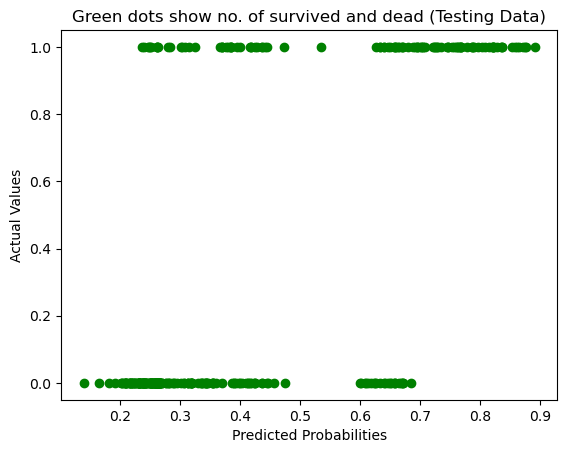

In [17]:
# Plot for testing data predictions
plt.scatter(predicted_probs, test_data['Survived'], color="green")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Values")
plt.title("Green dots show no. of survived and dead (Testing Data)")
plt.show()